<a href="https://colab.research.google.com/github/612943810/email-spam-model/blob/main/79Assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 04
#Email Spam  Detection Model
#Name:Raiyan Rofiquzzaman
# Student ID(Last 4 digits):4979


##If you need a copy of the dataset,please refer to the foillowing link:
[Enron Spam Data](https://github.com/MWiechmann/enron_spam_data)

#Prelimanary Data Analysis

###Import Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
readSpam=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/enron_spam_data.csv')

In [ ]:
readSpam.head()

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


##Training and Test Sets

###Drop Unnessary Columns

In [ ]:
readSpam.drop(columns=['Message ID','Subject','Date'],axis=1,inplace=True)

In [ ]:
readSpam.head(5)

,Message,Spam/Ham
0,NaN,ham
1,"gary , production from the high island larger ...",ham
2,- calpine daily gas nomination 1 . doc,ham
3,fyi - see note below - already done .\nstella\...,ham
4,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham


###Check for Null Values

In [ ]:
readSpam.isnull().sum()

Message     371
Spam/Ham      0
dtype: int64

###Drop null values

In [ ]:
readSpam.dropna(how='any',inplace=True)

In [ ]:
readSpam.isnull().sum()

Message     0
Spam/Ham    0
dtype: int64

#Machine Learning Portion

##Convert Labels

In [ ]:
from sklearn import preprocessing

In [ ]:
newLabel=preprocessing.LabelEncoder()

In [ ]:
readSpam['Spam/Ham']=newLabel.fit_transform(readSpam['Spam/Ham'])

In [ ]:
readSpam.head()

,Message,Spam/Ham
1,"gary , production from the high island larger ...",0
2,- calpine daily gas nomination 1 . doc,0
3,fyi - see note below - already done .\nstella\...,0
4,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0
5,"jackie ,\nsince the inlet to 3 river plant is ...",0


####Training Set

In [ ]:
featureSet=readSpam['Message'].values

In [ ]:
featureSet

array(['gary , production from the high island larger block a - 1 # 2 commenced on\nsaturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and\n10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .\ngeorge x 3 - 6992\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\ndaren j farmer\n12 / 10 / 99 10 : 38 am\nto : carlos j rodriguez / hou / ect @ ect\ncc : george weissman / hou / ect @ ect , melissa graves / hou / ect @ ect\nsubject : vastar resources , inc .\ncarlos ,\nplease call linda and get everything set up .\ni \' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each\nfollowing day based on my conversations with bill fischer at bmar .\nd .\n- - - - - - - - - - - - - - - - - - - - - - forwarded by daren j farmer / hou / ect on 12 / 10 / 99 10 : 34\nam - - - - - - - - - - - - - - - - - - - - - - -

In [ ]:
featureSet.shape

(33345,)

In [ ]:
labelSet=readSpam['Spam/Ham'].values

In [ ]:
labelSet.shape

(33345,)

###Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
spamXTrain,spamXTest,spamYTrain,spamYTest=train_test_split(featureSet,labelSet,test_size=0.2,random_state=42)

In [ ]:
spamXTrain

array(['attention lucky winner ,\ni am mr . douglas randall the fiduciary agent assigned to your case . i wish to congratulate you on your victory , you are a lucky person to have won this lottery . your email address was amongst those chosen this quarter from our new java - based software that randomly selects email addresses from the web from which winners are selected . you are required to forward the following details to help facilitate the processing of your claims and certificate which will facilitate the release of your winnings .\nyour winning price is to the tune of two million euros .\n1 . full names .\n2 . phone number .\n3 . fax number .\n4 . occupation .\n5 . sex .\n6 . age .\n7 . nationality .\nyou are advised to forward this information as soon as possible to enable us attend to your winnings . our firm has been contracted to handle payments on your behalf , once we confirm your information , your payments would be processed . everything was done in such a way that\nour 

In [ ]:
spamXTrain.shape

(26676,)

In [ ]:
spamXTest.shape

(6669,)

In [ ]:
spamYTrain.shape

(26676,)

In [ ]:
spamYTest.shape

(6669,)

###Convert Text

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
mainToken=Tokenizer()

In [ ]:
mainToken.fit_on_texts(spamXTrain)

In [ ]:
encodeMessageTrain=mainToken.texts_to_sequences(spamXTrain)

In [ ]:
encodeMessageTest=mainToken.texts_to_sequences(spamXTest)

In [ ]:
print(encodeMessageTrain[1])

[7, 223, 28, 682, 492, 11, 134, 39, 166, 339, 13262, 7582, 29, 2159, 62, 22695, 28, 3115, 7321, 29, 2159, 44, 19926, 558, 1262, 3371, 732, 415, 3057, 3371, 470, 2, 964, 13656, 4, 3371, 228, 55, 67, 56, 90, 1947, 156, 205, 1, 2132, 61, 18, 2497, 13, 12284, 9, 354, 2, 488, 1443, 21, 1, 3371, 42040, 1, 6814, 4, 732, 415, 179, 20, 1907, 14, 29, 11, 68, 1, 3371, 7840, 24, 31, 18, 908, 76, 1, 2080, 489, 3, 24, 1404, 2071, 1, 3057, 411, 147, 1, 3831, 41, 14514, 1, 458, 486, 1662, 850, 30, 2953, 1140, 165, 157, 439, 304, 7840, 1518, 3, 3075, 2112, 9975, 2, 383, 2080, 17, 381, 3940, 269, 5, 3314, 3057, 2597, 1, 7928, 4756, 4, 732, 415, 1774, 4, 349, 129, 23, 464, 7009, 3819, 188, 2731, 1, 278, 3371, 372, 1779, 2, 18, 14, 732, 415, 583, 1494, 30, 683, 156, 205, 50, 24, 31, 18, 58337, 96, 10, 9810, 14, 1, 3371, 61, 18, 3016, 513, 4, 1, 583, 1494, 155, 1, 441, 434, 2, 2740, 423, 204, 525, 1919, 99, 699, 235, 2080, 26, 1196, 26710, 70, 1, 3371, 3338, 2080, 1774, 14, 23, 73, 1494, 155, 1, 441, 434, 

###Convert Message to Same Shape

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
mainSize=10
padTrain=pad_sequences(encodeMessageTrain,maxlen=mainSize,padding='post')
padTest=pad_sequences(encodeMessageTest,maxlen=mainSize,padding='post')

In [ ]:
padTrain.shape

(26676, 10)

In [ ]:
padTest.shape

(6669, 10)

#Finding the Best Model

In [ ]:
from tensorflow.keras import models

### Initial Model

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
spamModel=models.Sequential()

In [ ]:

wordLength=len(mainToken.word_index) +1
spamModel.add(layers.Embedding(wordLength,20,input_length=mainSize))
spamModel.add(layers.Flatten())
spamModel.add(layers.Dense(2,activation='relu'))
spamModel.add(layers.Dense(2,activation='relu'))
spamModel.add(layers.Dropout(0.6))
spamModel.add(layers.Dense(2,activation='relu'))
spamModel.add(layers.Dense(1,activation='sigmoid'))


In [ ]:
spamModel.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
finalOutput=spamModel.fit(padTrain,spamYTrain,
                          epochs=30,
                          batch_size=2000,
                          validation_data=(padTest,spamYTest))

Epoch 1/30
14/14 [==============================] - 2s 46ms/step - loss: 0.6874 - accuracy: 0.5072 - val_loss: 0.6787 - val_accuracy: 0.5002
Epoch 2/30
14/14 [==============================] - 0s 29ms/step - loss: 0.6684 - accuracy: 0.5713 - val_loss: 0.6584 - val_accuracy: 0.7521
Epoch 3/30
14/14 [==============================] - 0s 29ms/step - loss: 0.6495 - accuracy: 0.6185 - val_loss: 0.6363 - val_accuracy: 0.8187
Epoch 4/30
14/14 [==============================] - 0s 29ms/step - loss: 0.6336 - accuracy: 0.6360 - val_loss: 0.6134 - val_accuracy: 0.8502
Epoch 5/30
14/14 [==============================] - 0s 29ms/step - loss: 0.6182 - accuracy: 0.6442 - val_loss: 0.5913 - val_accuracy: 0.8773
Epoch 6/30
14/14 [==============================] - 0s 23ms/step - loss: 0.6010 - accuracy: 0.6607 - val_loss: 0.5683 - val_accuracy: 0.8845
Epoch 7/30
14/14 [==============================] - 0s 24ms/step - loss: 0.5899 - accuracy: 0.6667 - val_loss: 0.5477 - val_accuracy: 0.8937
Epoch 8/30
14

In [ ]:
spamModel.predict(padTest)

array([[0.40417898],
       [0.40417898],
       [0.40417898],
       ...,
       [0.40417898],
       [0.40417898],
       [0.40417898]], dtype=float32)

In [ ]:
spamModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 20)            2782800   
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 2)                 402       
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dropout (Dropout)           (None, 2)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [ ]:
mainAccuracy=finalOutput.history['accuracy']
mainValAccuracy=finalOutput.history['val_accuracy']
mainLoss=finalOutput.history['loss']
mainValLoss=finalOutput.history['val_loss']

In [ ]:
epochLength=range(1,len(mainAccuracy)+1)

<Figure size 432x288 with 0 Axes>

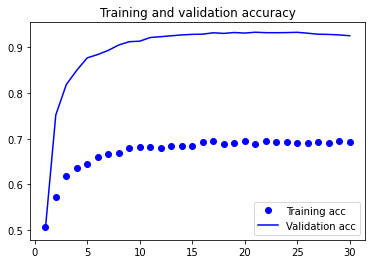

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochLength,mainAccuracy,'bo',label='Training acc')
plt.plot(epochLength,mainValAccuracy,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

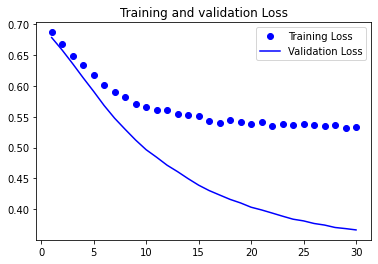

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochLength,mainLoss,'bo',label='Training Loss')
plt.plot(epochLength,mainValLoss,'b',label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

###This model is pretty good but overfitting is still there. Let's change more hyperparameters

#Change amount of each Dense layer

In [ ]:
spamModel=models.Sequential()
wordLength=len(mainToken.word_index) +1
spamModel.add(layers.Embedding(wordLength,20,input_length=mainSize))
spamModel.add(layers.Flatten())
spamModel.add(layers.Dense(50,activation='relu'))
spamModel.add(layers.Dense(50,activation='relu'))
spamModel.add(layers.Dropout(0.6))
spamModel.add(layers.Dense(50,activation='relu'))
spamModel.add(layers.Dense(1,activation='sigmoid'))


In [ ]:
spamModel.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
finalOutput=spamModel.fit(padTrain,spamYTrain,
                          epochs=30,
                          batch_size=2000,
                          validation_data=(padTest,spamYTest))

Epoch 1/30
14/14 [==============================] - 1s 44ms/step - loss: 0.6759 - accuracy: 0.6350 - val_loss: 0.6061 - val_accuracy: 0.7910
Epoch 2/30
14/14 [==============================] - 0s 32ms/step - loss: 0.4917 - accuracy: 0.8632 - val_loss: 0.3381 - val_accuracy: 0.9097
Epoch 3/30
14/14 [==============================] - 0s 31ms/step - loss: 0.2457 - accuracy: 0.9470 - val_loss: 0.1885 - val_accuracy: 0.9381
Epoch 4/30
14/14 [==============================] - 0s 31ms/step - loss: 0.1183 - accuracy: 0.9732 - val_loss: 0.1412 - val_accuracy: 0.9474
Epoch 5/30
14/14 [==============================] - 0s 30ms/step - loss: 0.0601 - accuracy: 0.9858 - val_loss: 0.1297 - val_accuracy: 0.9523
Epoch 6/30
14/14 [==============================] - 0s 31ms/step - loss: 0.0347 - accuracy: 0.9915 - val_loss: 0.1340 - val_accuracy: 0.9529
Epoch 7/30
14/14 [==============================] - 0s 31ms/step - loss: 0.0212 - accuracy: 0.9948 - val_loss: 0.1418 - val_accuracy: 0.9541
Epoch 8/30
14

In [ ]:
spamModel.predict(padTrain)

array([[9.9999952e-01],
       [6.2852674e-09],
       [3.2266179e-11],
       ...,
       [8.7557484e-05],
       [5.3289377e-17],
       [1.0000000e+00]], dtype=float32)

In [ ]:
mainAccuracy=finalOutput.history['accuracy']
mainValAccuracy=finalOutput.history['val_accuracy']
mainLoss=finalOutput.history['loss']
mainValLoss=finalOutput.history['val_loss']

In [ ]:
epochLength=range(1,len(mainAccuracy)+1)

<Figure size 432x288 with 0 Axes>

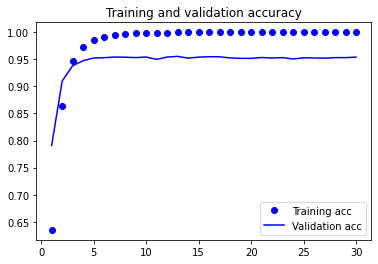

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochLength,mainAccuracy,'bo',label='Training acc')
plt.plot(epochLength,mainValAccuracy,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

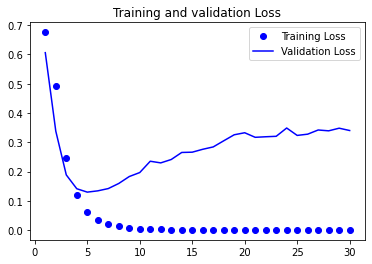

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochLength,mainLoss,'bo',label='Training Loss')
plt.plot(epochLength,mainValLoss,'b',label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

#####The accuracy has improved by inccreaseing the amount of each dense layer but there  is still overfitting.

##Weight Regularization

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
spamModel=models.Sequential()
wordLength=len(mainToken.word_index) +1
spamModel.add(layers.Embedding(wordLength,2,input_length=mainSize))
spamModel.add(layers.Flatten())
spamModel.add(layers.Dense(50,activation='relu',kernel_regularizer=regularizers.l1(l1=0.002)))
spamModel.add(layers.Dense(50,activation='relu',kernel_regularizer=regularizers.l1(l1=0.002,)))
spamModel.add(layers.Dropout(0.5))
spamModel.add(layers.Dense(50,activation='relu',kernel_regularizer=regularizers.l1(l1=0.002,)))
spamModel.add(layers.Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l1(l1=0.002,)))


In [ ]:
spamModel.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
finalOutput=spamModel.fit(padTrain,spamYTrain,
                          epochs=30,
                          batch_size=2000,
                          validation_data=(padTest,spamYTest))

Epoch 1/30
14/14 [==============================] - 1s 30ms/step - loss: 2.1040 - accuracy: 0.5433 - val_loss: 1.9834 - val_accuracy: 0.5559
Epoch 2/30
14/14 [==============================] - 0s 15ms/step - loss: 1.9091 - accuracy: 0.6168 - val_loss: 1.8211 - val_accuracy: 0.6107
Epoch 3/30
14/14 [==============================] - 0s 14ms/step - loss: 1.7562 - accuracy: 0.6528 - val_loss: 1.6778 - val_accuracy: 0.8153
Epoch 4/30
14/14 [==============================] - 0s 15ms/step - loss: 1.6182 - accuracy: 0.7359 - val_loss: 1.5471 - val_accuracy: 0.8280
Epoch 5/30
14/14 [==============================] - 0s 14ms/step - loss: 1.4913 - accuracy: 0.7652 - val_loss: 1.4264 - val_accuracy: 0.7818
Epoch 6/30
14/14 [==============================] - 0s 16ms/step - loss: 1.3728 - accuracy: 0.7786 - val_loss: 1.3108 - val_accuracy: 0.8673
Epoch 7/30
14/14 [==============================] - 0s 14ms/step - loss: 1.2567 - accuracy: 0.8204 - val_loss: 1.1936 - val_accuracy: 0.8773
Epoch 8/30
14

In [ ]:
spamModel.predict(padTrain)

array([[9.7952139e-01],
       [7.1228147e-03],
       [1.1125207e-03],
       ...,
       [6.3925153e-01],
       [9.6989097e-06],
       [9.9663866e-01]], dtype=float32)

In [ ]:
mainAccuracy=finalOutput.history['accuracy']
mainValAccuracy=finalOutput.history['val_accuracy']
mainLoss=finalOutput.history['loss']
mainValLoss=finalOutput.history['val_loss']

In [ ]:
epochLength=range(1,len(mainAccuracy)+1)

<Figure size 432x288 with 0 Axes>

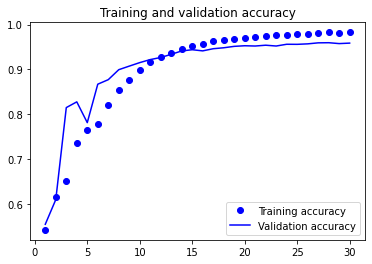

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochLength,mainAccuracy,'bo',label='Training accuracy')
plt.plot(epochLength,mainValAccuracy,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

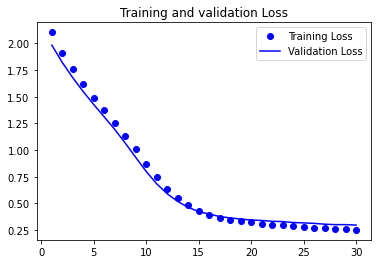

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochLength,mainLoss,'bo',label='Training Loss')
plt.plot(epochLength,mainValLoss,'b',label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

####By adding weight regularization, we narrow the gap  for overfitting.

##Adding more epochs

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
spamModel=models.Sequential()
wordLength=len(mainToken.word_index) +1
spamModel.add(layers.Embedding(wordLength,2,input_length=mainSize))
spamModel.add(layers.Flatten())
spamModel.add(layers.Dense(50,activation='relu',kernel_regularizer=regularizers.l1(l1=0.002)))
spamModel.add(layers.Dense(50,activation='relu',kernel_regularizer=regularizers.l1(l1=0.002,)))
spamModel.add(layers.Dropout(0.5))
spamModel.add(layers.Dense(50,activation='relu',kernel_regularizer=regularizers.l1(l1=0.002,)))
spamModel.add(layers.Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l1(l1=0.002,)))

In [ ]:
spamModel.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
finalOutput=spamModel.fit(padTrain,spamYTrain,
                          epochs=60,
                          batch_size=2000,
                          validation_data=(padTest,spamYTest))

Epoch 1/60
14/14 [==============================] - 1s 30ms/step - loss: 2.0866 - accuracy: 0.5169 - val_loss: 1.9665 - val_accuracy: 0.5962
Epoch 2/60
14/14 [==============================] - 0s 14ms/step - loss: 1.8926 - accuracy: 0.6128 - val_loss: 1.8046 - val_accuracy: 0.5764
Epoch 3/60
14/14 [==============================] - 0s 15ms/step - loss: 1.7400 - accuracy: 0.6605 - val_loss: 1.6622 - val_accuracy: 0.7304
Epoch 4/60
14/14 [==============================] - 0s 14ms/step - loss: 1.6022 - accuracy: 0.6979 - val_loss: 1.5301 - val_accuracy: 0.8465
Epoch 5/60
14/14 [==============================] - 0s 14ms/step - loss: 1.4733 - accuracy: 0.7277 - val_loss: 1.4054 - val_accuracy: 0.8776
Epoch 6/60
14/14 [==============================] - 0s 15ms/step - loss: 1.3505 - accuracy: 0.7619 - val_loss: 1.2860 - val_accuracy: 0.8079
Epoch 7/60
14/14 [==============================] - 0s 15ms/step - loss: 1.2282 - accuracy: 0.7939 - val_loss: 1.1588 - val_accuracy: 0.8965
Epoch 8/60
14

In [ ]:
spamModel.predict(padTrain)

array([[9.9544710e-01],
       [1.2655258e-03],
       [1.5117853e-05],
       ...,
       [2.2603044e-01],
       [8.5480409e-08],
       [9.9886805e-01]], dtype=float32)

In [ ]:
mainAccuracy=finalOutput.history['accuracy']
mainValAccuracy=finalOutput.history['val_accuracy']
mainLoss=finalOutput.history['loss']
mainValLoss=finalOutput.history['val_loss']

In [ ]:
epochLength=range(1,len(mainAccuracy)+1)

<Figure size 432x288 with 0 Axes>

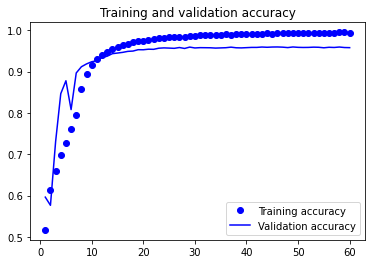

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochLength,mainAccuracy,'bo',label='Training accuracy')
plt.plot(epochLength,mainValAccuracy,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

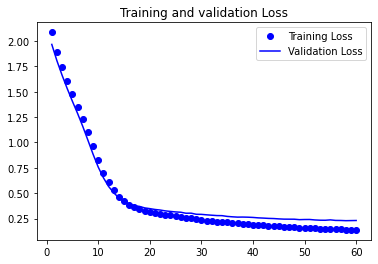

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochLength,mainLoss,'bo',label='Training Loss')
plt.plot(epochLength,mainValLoss,'b',label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

####This approach as greatly reduced overfitting and because the accuracy is very good we can say 60 epochs is need to create an acceptable model.

#Conclusion

#### Throughouut this project, I have learned many techniques in  machine learning. Weight regularization and dropout are the main protectors of overfitting. Without them, we would get biased results.

####In addition ,as overfitting increases, loss increases. This concept helped me to make more efficient  models.

####Finally, we get accurate results asa we train more data and increase the number of epochs.